In [3]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd


# Data paths
Game_Logs_Quarterback_path = "../Resources/Game_Logs_Quarterback.csv"
Game_Logs_Runningback_path = "../Resources/Game_Logs_Runningback.csv"
Game_Logs_Wide_Receiver_and_Tight_End_path = "../Resources/Game_Logs_Wide_Receiver_and_Tight_End.csv"


# Reading relevant datasets
QB_data = pd.read_csv(Game_Logs_Quarterback_path)
Runningback_data = pd.read_csv(Game_Logs_Runningback_path)
WR_Tightend_data = pd.read_csv(Game_Logs_Wide_Receiver_and_Tight_End_path)

# Merging Datasets
Rushing_data = pd.merge(QB_data, Runningback_data, how="left")
Rushing_data = pd.merge(Rushing_data, WR_Tightend_data, how="left")

# Keeping relevant columns
Rushing_data_reduced = Rushing_data.loc[:, ["Player Id", "Year", "Outcome", "Score", "Rushing Attempts", 
                                            "Rushing Yards", "Yards Per Carry", "Rushing TDs"]]

# Keeping only years after 2000
Rushing_data_reduced_clean = Rushing_data_reduced.loc[(Rushing_data_reduced["Year"] >= 2000)]

# Formatting score to only have player's team's score
Rushing_data_reduced_clean[["Score", "to", "Opponent Score"]] = Rushing_data_reduced_clean["Score"].str.split(expand=True)
Rushing_yards = Rushing_data_reduced_clean.loc[:, ["Score", "Rushing Yards"]]


# Removing any empty values in Rushing Yards
Rushing_yards_clean = Rushing_yards.loc[(Rushing_yards["Rushing Yards"] != "--")]

# Converting score column and rushing yards column to int
Rushing_yards_clean["Score"] = Rushing_yards_clean["Score"].astype(int)
Rushing_yards_clean["Rushing Yards"] = Rushing_yards_clean["Rushing Yards"].astype(int)

#Rushing_yards_clean = Rushing_yards_clean.loc[(Rushing_yards_clean["Rushing Yards"] > 0)]

Rushing_yards_clean

C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Chris\AppData\Local\Temp/ipykernel_5820/2807180537.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rushing_yards_clean["Score"] = Rushing_yards_clean["Score"].astype(int)
C:\Users\Chris\AppData\Local\Temp/ipykernel_5820/2807180537.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,Score,Rushing Yards
3,24,17
31,16,1
33,28,5
47,21,0
48,12,11
...,...,...
40159,17,6
40161,3,2
40162,13,19
40163,24,3


The r-squared is: 0.0005191660288050446


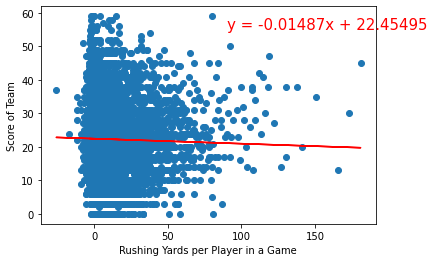

In [4]:
x_values = Rushing_yards_clean["Rushing Yards"]
y_values = Rushing_yards_clean["Score"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(90,55),fontsize=15,color="red")
plt.xlabel('Rushing Yards per Player in a Game')
plt.ylabel('Score of Team')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
'''
With an R^2 value of 0.0005, there is a very weak correlation between score and rushing yards per player in a game. 
The regression line shows a slight negative correlation when including net negative rushing yards.
''' 

